//anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


HAT-P-14 start alt  = 088.71 deg, az = 233.79 deg
HAT-P-14 center alt = 076.04 deg, az = 272.48 deg
HAT-P-14 end alt    = 064.21 deg, az = 278.88 deg


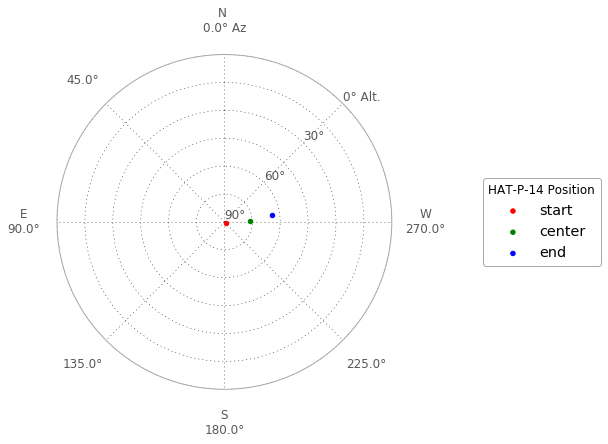

In [1]:
%matplotlib inline

from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
from astroplan import Observer, FixedTarget
from astroplan.plots import plot_sky

plt.style.use(astropy_mpl_style)

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

target_coord = SkyCoord.from_name('HAT-P-14')
target = FixedTarget(coord=target_coord, name="HAT-P-14")

# 39.002100, -76.956276 - UMD Observatory
loc = EarthLocation(lat=39.002100*u.deg, lon=-76.956276*u.deg, height=54.220*u.m)

obs = Observer(location=loc, name='UMD Observatory', timezone="US/Eastern")


utcoffset = -4*u.hour # EDT
time_start = Time('2016-08-05 01:38:00')
time_center = Time('2016-08-05 02:44:00')
time_end = Time('2016-08-04 03:49:00')

target_altaz_start = target_coord.transform_to(AltAz(obstime=time_start,location=loc))
target_altaz_center = target_coord.transform_to(AltAz(obstime=time_center,location=loc))
target_altaz_end = target_coord.transform_to(AltAz(obstime=time_end,location=loc))
print("HAT-P-14 start alt  = {0.alt:06.2f}, az = {0.az:06.2f}".format(target_altaz_start))
print("HAT-P-14 center alt = {0.alt:06.2f}, az = {0.az:06.2f}".format(target_altaz_center))
print("HAT-P-14 end alt    = {0.alt:06.2f}, az = {0.az:06.2f}".format(target_altaz_end))

start_style = {'color': 'r'}
center_style = {'color': 'g'}
end_style = {'color': 'b'}

plot_sky(target, obs, time_start, style_kwargs=start_style)
plot_sky(target, obs, time_center, style_kwargs=center_style)
plot_sky(target, obs, time_end, style_kwargs=end_style)

plt.legend(['start', 'center', 'end'], loc='center left', bbox_to_anchor=(1.25, 0.5), scatterpoints=1, title="HAT-P-14 Position")
plt.show()
